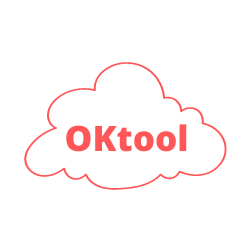

# **OKtool: the Overlapping K-mer tool (oktool.cloud)**
This is an easy-to-use Python-based interactive notebook for calculating overlapping k-mers of desired length from a list of protein or DNA sequences. You will receive a **FASTA** file for your k-mers.

A **CSV** file containing the  sequences in a column should be uploaded to the Colab environment using the left-hand side panel. The file should have a header value for the column.

In the form field below, please **replace** "examplefile.csv" with the **name of your file**, including the .csv extension.

Additionally, **input your desired k-mer length**. Note that if any of your sequences are shorter than the desired k-mer length, k-mers can not be calculated. Sequences that are too short will be displayed in the code output below the code cell.

Put the name of the column where the sequences are found.

Input the name of the output file you would like to have. **Include the extension (.fasta).**

Choose from the dropdown if you want detailedFASTA or simpleFASTA. DetailedFASTA includes the parent sequence in the output file while simpleFASTA just includes the k-mer sequence. We recommend simpleFASTA if you have a long input sequence.

**Feel free to modify the code to fit your needs. It will not affect other users and changes will be erased after you are done.**

To run OKtool with an example file, download the CSV here to your computer and upload into Colab. [Click here](https://drive.google.com/file/d/1hA_Uu7eHtS5JB1xUlD5RJ9sdxztkDmAW/view?usp=sharing)

Video [tutorial](https://youtu.be/6HFlwqK3oeo?t=174) for uploading files to Colab, from Dr. Chanin Nantasenamat.

**Disclaimer!** Please check all outputs and make sure it is what you want.

In [ ]:
yourFileName = "examplefile.csv" #@param {type:"string"}
desiredKmerLength =  5 #@param {type:"integer"}
columnName = "Sequences" #@param {type:"strin
outputName = "outputfile.fasta" #@param {type:"string"}
fastaType = "simpleFASTA" #@param ["detailedFASTA", "simpleFASTA"]

After inputting your information, hover your mouse over the top left corner of the above form field block. Look for the circle with a triangle inside. Click the circle to submit the form data. Then, go to the below code block and go to the top left corner again. Click the circle.

In [ ]:
#imports pandas library
import pandas as pd
#loads in csv file to a dataframe
df = pd.read_csv(yourFileName)
#initializes counter variable to zero
counter = 0
kmerCounter = 0

#creates file that content is going to be outputted in
with open(outputName, 'w') as writefile:
  #first line (header) of output file
  writefile.write(outputName + "\n")

#while loop that iterates through the dataframe until all the sequences are read through
while(counter<len(df)): 
  #retrieves protein sequence in the column at the counter value starting from the first sequence. take out newlines
  proteinSequence = df[columnName][counter].replace("\n", "")

  #testing to verify if the protein sequence is longer than the desired kmer length
  if(len(proteinSequence)>=desiredKmerLength):
    #gets list of all kmers from protein sequence
    #Kmer slicing code adapted from GeeksForGeeks: https://www.geeksforgeeks.org/python-program-to-split-string-into-k-sized-overlapping-strings/
    kmerpeptides = [proteinSequence[idx:idx + desiredKmerLength] for idx in range(len(proteinSequence) - desiredKmerLength + 1)]
    #goes through the list one by one
    for x in range(len(kmerpeptides)):
      #increment kmer counter
      kmerCounter+=1
      #appending each kmer to the file
      f = open(outputName, "a")
      
      if fastaType == "detailedFASTA":
        f.writelines(">ParentSequence:" + proteinSequence + ",kmer:" + kmerpeptides[x] + "\n")
        f.writelines(kmerpeptides[x] + "\n")
      else:
        f.writelines(">" + kmerpeptides[x] + "\n")
        f.writelines(kmerpeptides[x] + "\n")
  #if the protein sequence is shorter than the desired kmer length, a message will be output
  else:
    print(proteinSequence + " is too short for the desired k-mer length.")
  counter+=1

print("Number of k-mers: " + str(kmerCounter))


Number of k-mers: 205


The code output (above) will inform you if any of your sequences are too short for the desired k-mer length.

**Download** your resulting FASTA file from the left panel where you originally uploaded your CSV file. Simple hover over the file name and click on the three vertical dots to the right. Click download.


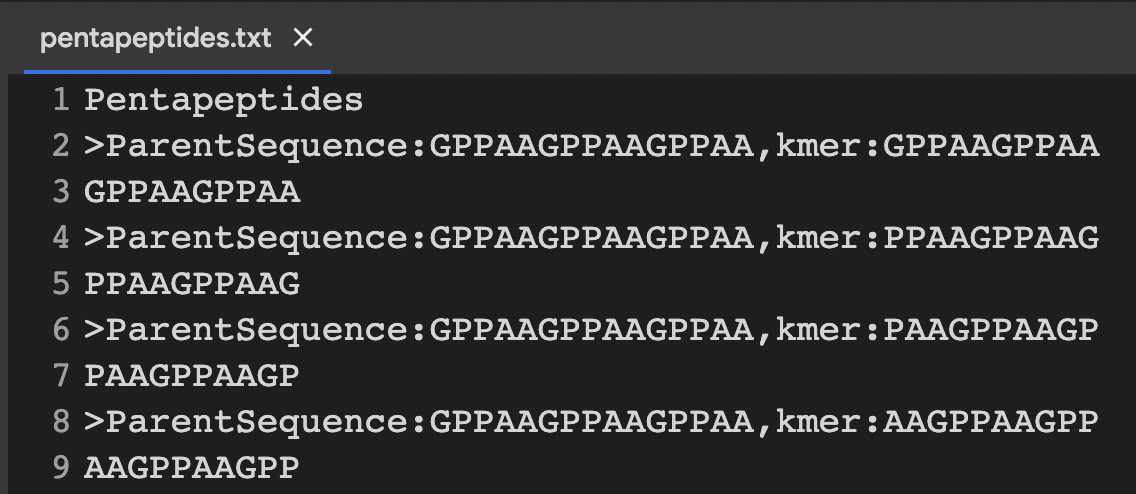

**Output explanation:**
The first line is a header "Pentapeptides". You can easily delete this in Notepad or TextEdit.

The k-mers are given in FASTA format with the FASTA ID containing the "ParentSequence" from which the k-mer is derived, and the k-mer itself.

It is simple to use Regex if you only want the parent sequence or the k-mer in the FASTA ID. Alternatively, feel free to edit the above code.

# Thank you for using the OKtool!